In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import seaborn as sns

# The normal imports
from numpy.random import randn

# Import the stats librayr from numpy
from scipy import stats
from sklearn.naive_bayes import GaussianNB

# Command so that plots appear in the iPython Notebook
%matplotlib inline

train = pd.read_csv('SumStudentClicksxResult-2-0-50.csv')   # better be in the correct directory!
test = pd.read_csv('SumStudentClicksxResult-2-50-100.csv')
test.head(5)

id_student  SumOfsum_click final_result
0      100893             250         Pass
1      101781             891         Pass
2      102806             486         Pass
3      102952             242         Pass
4     1035023             496         Pass

In [3]:
train.head(5)

id_student  SumOfsum_click final_result
0      100893             206         Pass
1      101781            1505         Pass
2      102806             590         Pass
3      102952             444         Pass
4     1035023             459         Pass

In [4]:


cols = ['SumOfsum_click']
cols2 = ['final_result']

trainArr = train.as_matrix(cols)
trainRes = train.as_matrix(cols2)

testArr = test.as_matrix(cols)
testRes = test.as_matrix(cols2)

gnb = GaussianNB()
#print(trainArr[0])
#print(trainRes[0])
#print(testArr[0])
#print(testRes[0])

output = gnb.fit(trainArr, trainRes).predict(testArr)

for i in range(390):
    #if testRes[i][0] == output[i] and testRes[i]=="Distinction":
    #if testRes[i][0] == output[i] and testRes[i]<>"Pass":
    if testRes[i][0] == output[i]:
        #print ""
        print("PREDICTION :    " + str(output[i])) + "  " + str(testArr[i]) + "       " + str(testRes[i] + "     CORRECT")
    else:
        print(str(i) + "PREDICTION:    " + str(output[i])) + "  " + str(testArr[i]) + "       " + str(testRes[i])


PREDICTION :    Pass  [250]       ['Pass     CORRECT']
PREDICTION :    Pass  [891]       ['Pass     CORRECT']
PREDICTION :    Pass  [486]       ['Pass     CORRECT']
PREDICTION :    Pass  [242]       ['Pass     CORRECT']
PREDICTION :    Pass  [496]       ['Pass     CORRECT']
PREDICTION :    Pass  [683]       ['Pass     CORRECT']
6PREDICTION:    Pass  [170]       ['Withdrawn']
PREDICTION :    Pass  [82]       ['Pass     CORRECT']
PREDICTION :    Pass  [214]       ['Pass     CORRECT']
PREDICTION :    Pass  [473]       ['Pass     CORRECT']
PREDICTION :    Pass  [821]       ['Pass     CORRECT']
PREDICTION :    Pass  [971]       ['Pass     CORRECT']
PREDICTION :    Pass  [201]       ['Pass     CORRECT']
PREDICTION :    Pass  [168]       ['Pass     CORRECT']
PREDICTION :    Pass  [355]       ['Pass     CORRECT']
PREDICTION :    Pass  [431]       ['Pass     CORRECT']
PREDICTION :    Pass  [295]       ['Pass     CORRECT']
PREDICTION :    Pass  [118]       ['Pass     CORRECT']
PREDICTION :    Pa

/Users/maryl/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
correct = 0.0

for i in range(len(output)): 
    if testRes[i][0] == output[i]: 
        correct += 1
    
print(correct / len(output))


#print("Accuracy: " + gnb.score(testArr, testRes))
print("Accuracy: " + str(gnb.score(testArr, testRes)))

0.693094629156
Accuracy: 0.693094629156


In [128]:
count=0 
passn=0
fail=0
distinction=0
withdrawn=0
for i in range(len(output)): 
    count += 1
    if testRes[i][0]=='Pass':
        passn += 1
    if testRes[i][0]=='Fail':
        fail += 1
    if testRes[i][0]=='Distinction':
        distinction += 1
    if testRes[i][0]=='Withdrawn':
        withdrawn += 1
print ("Pass: " + str(passn))
print ("Fail: " + str(fail))
print ("Distinction: " + str(distinction))
print ("Withdrawn: " + str(withdrawn))
    

Pass: 275
Fail: 50
Distinction: 21
Withdrawn: 45


(array([ 216.,  109.,   35.,   12.,   10.,    4.,    1.,    0.,    1.,    3.]),
 array([  1.00000000e+00,   3.76300000e+02,   7.51600000e+02,
          1.12690000e+03,   1.50220000e+03,   1.87750000e+03,
          2.25280000e+03,   2.62810000e+03,   3.00340000e+03,
          3.37870000e+03,   3.75400000e+03]),
 <a list of 10 Patch objects>)

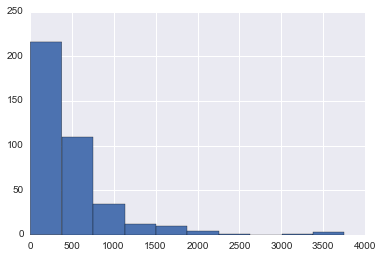

In [133]:
plt.hist(testArr)

(array([  1.73092557e-03,   1.21301084e-03,   9.40424131e-04,
          5.45173409e-04,   2.99845375e-04,   1.77181358e-04,
          1.09034682e-04,   5.45173409e-05,   8.17760114e-05,
          5.45173409e-05,   4.08880057e-05,   1.36293352e-05,
          1.36293352e-05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.36293352e-05,   0.00000000e+00,
          1.36293352e-05,   2.72586705e-05]),
 array([  1.00000000e+00,   1.88650000e+02,   3.76300000e+02,
          5.63950000e+02,   7.51600000e+02,   9.39250000e+02,
          1.12690000e+03,   1.31455000e+03,   1.50220000e+03,
          1.68985000e+03,   1.87750000e+03,   2.06515000e+03,
          2.25280000e+03,   2.44045000e+03,   2.62810000e+03,
          2.81575000e+03,   3.00340000e+03,   3.19105000e+03,
          3.37870000e+03,   3.56635000e+03,   3.75400000e+03]),
 <a list of 20 Patch objects>)

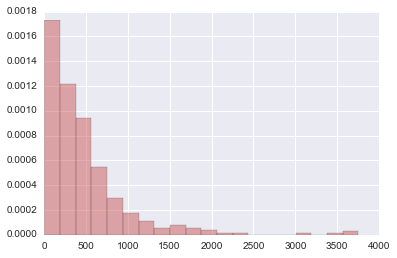

In [134]:
plt.hist(testArr, normed=True,color='indianred',alpha=0.5,bins=20)
#plt.hist(output, normed=True,alpha=0.5,bins=20)

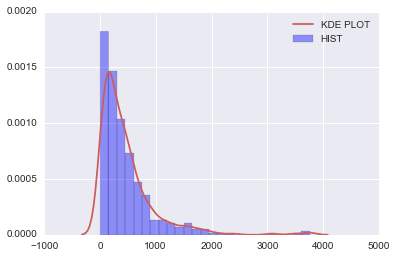

In [136]:
sns.distplot(testArr,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':"HIST"})

(array([  1.00707647e-03,   1.41693317e-03,   8.19713405e-04,
          5.73799383e-04,   3.27885362e-04,   2.45914021e-04,
          5.85509575e-05,   9.36815320e-05,   5.85509575e-05,
          1.17101915e-05,   3.51305745e-05,   1.17101915e-05,
          0.00000000e+00,   1.17101915e-05,   0.00000000e+00,
          3.51305745e-05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.17101915e-05]),
 array([    7. ,   218.9,   430.8,   642.7,   854.6,  1066.5,  1278.4,
         1490.3,  1702.2,  1914.1,  2126. ,  2337.9,  2549.8,  2761.7,
         2973.6,  3185.5,  3397.4,  3609.3,  3821.2,  4033.1,  4245. ]),
 <a list of 20 Patch objects>)

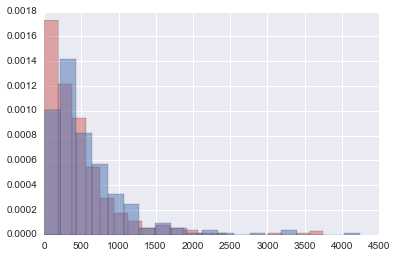

In [122]:
plt.hist(testArr, normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(trainArr, normed=True,alpha=0.5,bins=20)

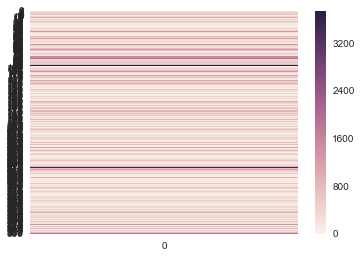

In [137]:
sns.heatmap(testArr)